In [1]:
import matplotlib.pyplot as plt
import geohunter as gh

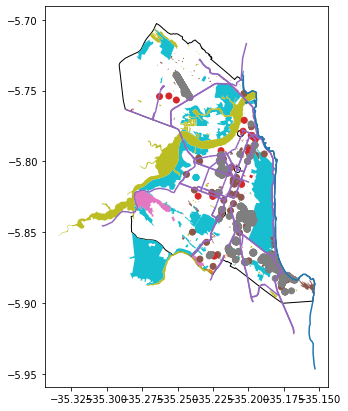

In [2]:
city = gh.osm.API.get('(-8.02, -41.01, -3.0, -33.0)', name='Natal')
poi = gh.osm.API.get(city,
    amenity=['school', 'hospital'], highway='primary', natural='*')

fig, ax = plt.subplots(figsize=(7,7))
city.plot(ax=ax, color='white', edgecolor='black')
poi.plot(column='mf_item', ax=ax)
plt.show()

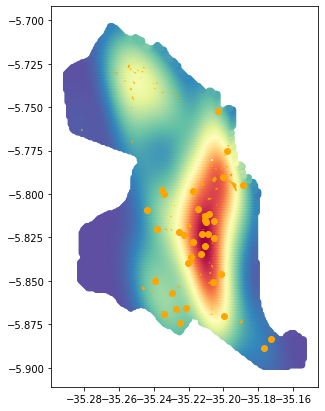

In [3]:
grid = gh.util.kde_interpolation(poi.loc[poi['mf_item']=='school'],
    area=city, resolution=0.1)

fig, ax = plt.subplots(figsize=(7,7))
city.plot(ax=ax, color='white', edgecolor='black')
grid.plot(ax=ax, column='density', figsize=(7,7), cmap='Spectral_r')
poi.loc[poi['mf_item']=='school'].plot(ax=ax, color='orange')
plt.show()